0.940246045694
0.952247191011
{'training time': 0.04400014877319336, 'prediction time': 0.0}


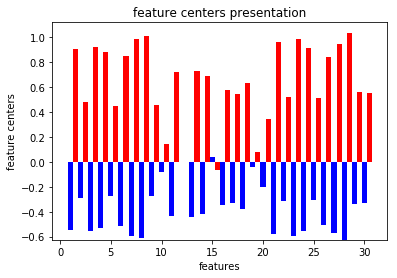

In [2]:
from Data_Process import Data_Process
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from Data_Visualization import Data_Visualization
from sklearn.metrics import f1_score
from time import time

# perform refined unsupervised learning on data set (Gaussian Mixture)
if __name__=="__main__":

    time_results = {}  # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X=Data_Process().data_normalization(X)

    # data training
    start1 = time()
    EM = GaussianMixture(n_components=2, random_state=0).fit(X)    # use 2 clusters
    end1=time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2=time()
    pred = EM.predict(X)
    end2=time()
    time_results['prediction time'] = end2 - start2
    
    predict=Data_Process().data_reverve(pred)    # make the labels easy to compare

    # compute the matrics
    cluster_accuracy= accuracy_score(Y, predict)
    cluster_fscore=f1_score(Y, predict)

    cluster_center= EM.means_    # center of each cluster

    print cluster_accuracy
    print cluster_fscore
    print time_results

    # visualization
    Data_Visualization().center_comp_vis(cluster_center)

0.95079086116
0.961111111111
{'training time': 0.11600017547607422, 'prediction time': 0.0}


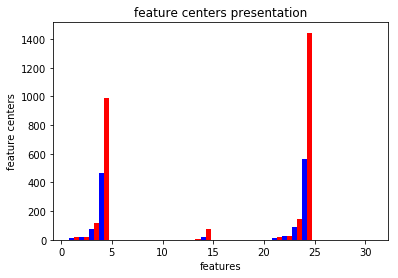

In [3]:
# if without normalization

if __name__=="__main__":

    time_results = {}  # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    # X=Data_Process().data_normalization(X)

    # data training
    start1 = time()
    EM = GaussianMixture(n_components=2, random_state=0).fit(X)    # use 2 clusters
    end1=time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2=time()
    pred = EM.predict(X)
    end2=time()
    time_results['prediction time'] = end2 - start2
    
    predict=Data_Process().data_reverve(pred)    # make the labels easy to compare

    # compute the matrics
    cluster_accuracy= accuracy_score(Y, predict)
    cluster_fscore=f1_score(Y, predict)

    cluster_center= EM.means_    # center of each cluster

    print cluster_accuracy
    print cluster_fscore
    print time_results

    # visualization
    Data_Visualization().center_comp_vis(cluster_center)

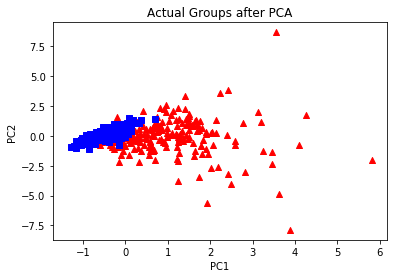

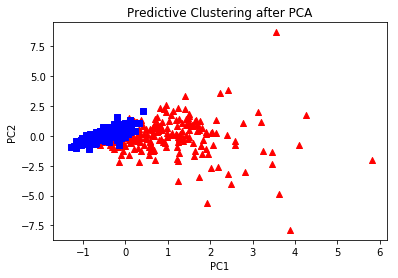

In [4]:
# visulization the clustering (performing PCA to reduce the features to two dimensions since 30 dimension is difficult to visualiza)
X, Y = Data_Process().get_data()
X=Data_Process().feature_extract(X, 2)
X=Data_Process().data_normalization(X)

# capture the index of label 0 ('M') and label 1 ('B')
cluster_M = []
cluster_B = []
for i, label in enumerate(Y):
    if label == 0:
        cluster_M.append(i)
    if label == 1:
        cluster_B.append(i)
# visualize the actual sample classification
Data_Visualization().scatter_vis2(X[cluster_M], X[cluster_B], 0)


# capture the index of label predicted as 0 ('M') and label predicted as 1 ('B')
cluster_M_pre=[]
cluster_B_pre=[]
for i, label in enumerate(predict):
    if label==0:
        cluster_M_pre.append(i)
    if label==1:
        cluster_B_pre.append(i)
# visualize the result of clusters performing GMM clustering
Data_Visualization().scatter_vis2(X[cluster_M_pre], X[cluster_B_pre], 1)

0.933216168717
0.948509485095
{'training time': 0.021999835968017578, 'prediction time': 0.0}


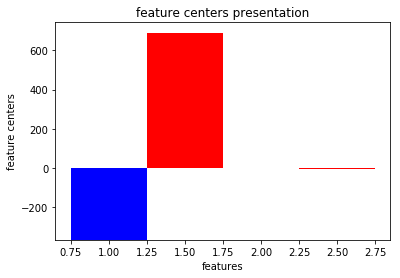

In [8]:
# perform refined unsupervised learning on data set (Gaussian Mixture)
if __name__=="__main__":

    time_results = {}  # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X=Data_Process().feature_extract(X, 2)
    #X=Data_Process().data_normalization(X)

    # data training
    start1 = time()
    EM = GaussianMixture(n_components=2, random_state=0).fit(X)    # use 2 clusters
    end1=time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2=time()
    pred = EM.predict(X)
    end2=time()
    time_results['prediction time'] = end2 - start2
    
    predict=Data_Process().data_reverve(pred)    # make the labels easy to compare

    # compute the matrics
    cluster_accuracy= accuracy_score(Y, predict)
    cluster_fscore=f1_score(Y, predict)

    cluster_center= EM.means_    # center of each cluster

    print cluster_accuracy
    print cluster_fscore
    print time_results

    # visualization
    Data_Visualization().center_comp_vis(cluster_center)